<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/Utils/Colab_25GBRAM_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.54GB
Used: 634.74MB
Percentage: 3.8%


# GPU Information

In [ ]:
! nvidia-smi

Sat May 16 10:39:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls drive/My\ Drive/ML-work/Okulo\ aerospace/Land\ cover\ classification\ 2/

data


In [3]:
cd drive/My\ Drive/ML-work/Okulo\ aerospace/Land\ cover\ classification\ 2/

/content/drive/My Drive/ML-work/Okulo aerospace/Land cover classification 2


In [4]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
import numpy as np 
import pandas as pd 
from glob import glob

In [16]:
name_train1 = sorted(glob("./data/TRAIN/*"))
name_train2 = sorted(glob("./data/TRAIN2/*"))
# name_test = sorted(glob("./data/TEST/*"))

y_train = np.load("./data/y_train.npy")
print(len(name_train1))
print(len(name_train2))
print(len(y_train))

10000
10000
20000


In [17]:
name_train1.extend(name_train2)
print(len(name_train1))

20000


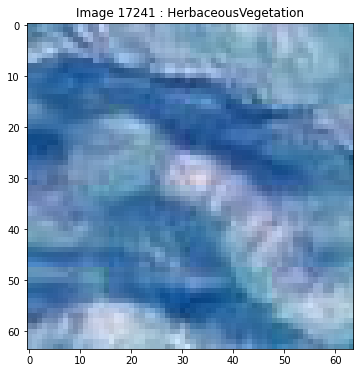

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

num = np.random.randint(len(name_train1))
plt.figure(figsize=(6, 6))
plt.title("Image {} : {}".format(num, y_train[num]))
plt.imshow(Image.open(name_train1[num]));

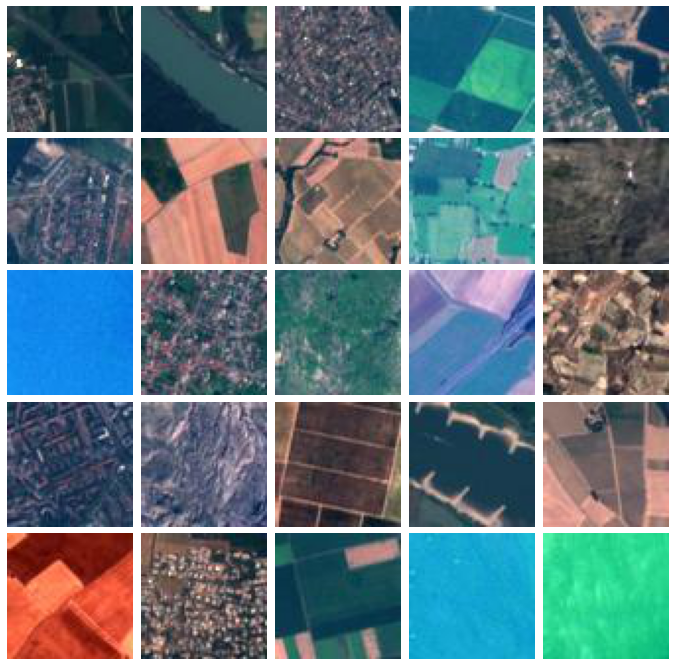

In [19]:
figure = plt.figure(figsize=(12, 12))
size = 5
grid = plt.GridSpec(size, size, hspace=0.05, wspace=0.0)

for line in range(size):
    for col in range(size):
        figure.add_subplot(grid[line, col])
        num = np.random.randint(len(name_train1))
        plt.imshow(Image.open(name_train1[num]))
        plt.axis('off')  

In [20]:
X_train = np.array([np.array(Image.open(jpg)) for jpg in name_train1])
# X_test = np.array([np.array(Image.open(jpg)) for jpg in name_test])


print (X_train.shape)
print (y_train.shape)

(20000, 64, 64, 3)
(20000,)


In [23]:
print (y_train[:30])

['Forest' 'PermanentCrop' 'HerbaceousVegetation' 'Pasture' 'Highway'
 'Forest' 'Residential' 'Residential' 'River' 'Pasture' 'Pasture'
 'Residential' 'PermanentCrop' 'Forest' 'HerbaceousVegetation'
 'Residential' 'SeaLake' 'SeaLake' 'Forest' 'HerbaceousVegetation'
 'Forest' 'Industrial' 'AnnualCrop' 'Industrial' 'Residential' 'SeaLake'
 'AnnualCrop' 'HerbaceousVegetation' 'Residential' 'PermanentCrop']


In [24]:
from sklearn.preprocessing import OneHotEncoder

print (f"Shape label raw : {y_train.shape}")

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

print (f"Shape label One Hot Encoded : {y_train.shape}")
print (f"Label for y_train[0] : {y_train[0]}")

Shape label raw : (20000,)
Shape label One Hot Encoded : (20000, 10)
Label for y_train[0] : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
X_train, X_valid = X_train[:17000], X_train[17000:]
y_train, y_valid = y_train[:17000], y_train[17000:]

In [27]:
# X_valid = X_valid[:4500]
# y_valid = y_valid[:4500]
print(X_valid.shape)

(3000, 64, 64, 3)


In [28]:
X_train, X_valid = X_train/255, X_valid/255
# X_train, X_valid, X_test = X_train*255, X_valid*255, X_test*255

In [30]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, batch_size = 32, 
                   validation_data=(X_valid, y_valid), epochs=25)

Train on 17000 samples, validate on 3000 samples
Epoch 1/25
17000/17000 [==============================] - 14s 802us/step - loss: 1.4158 - accuracy: 0.4675 - val_loss: 1.1305 - val_accuracy: 0.5983
Epoch 2/25
17000/17000 [==============================] - 7s 421us/step - loss: 0.9546 - accuracy: 0.6546 - val_loss: 0.8719 - val_accuracy: 0.6830
Epoch 3/25
17000/17000 [==============================] - 7s 422us/step - loss: 0.7867 - accuracy: 0.7214 - val_loss: 0.8665 - val_accuracy: 0.6747
Epoch 4/25
17000/17000 [==============================] - 7s 421us/step - loss: 0.6563 - accuracy: 0.7634 - val_loss: 0.6280 - val_accuracy: 0.7820
Epoch 5/25
17000/17000 [==============================] - 7s 421us/step - loss: 0.5427 - accuracy: 0.8084 - val_loss: 0.7058 - val_accuracy: 0.7610
Epoch 6/25
17000/17000 [==============================] - 7s 422us/step - loss: 0.4616 - accuracy: 0.8388 - val_loss: 0.5509 - val_accuracy: 0.8003
Epoch 7/25
17000/17000 [==============================] - 7s 4

In [33]:
loss, metrics = model.evaluate(X_valid, y_valid)

print (metrics)

3000/3000 [==============================] - 0s 159us/step
0.7733333110809326
